### 시계열데이터 사용
- 시계열데이터를 가지고 공공데이터와 병합
- 공공데이터는 원하시는 데이터로 사용해도 되고, 중요한 건 시계열 기반으로 데이터를 병합하시고
- 병합된 데이터를 가지고 시계열 데이터의 시각화를 통해 간단한 인사이트를 정리해 주세요.
- 주제는 자유이지만, 병합에서 공통 키는 시계열데이터입니다.

In [22]:
#한글 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
jeju = pd.read_csv('/content/drive/MyDrive/DATA/jeju_traffic.csv')
jeju

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [4]:
jeju['base_date'].min()

20210901

In [5]:
jeju['base_date'].max()

20220731

In [6]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

- 날씨데이터 변환

In [7]:
jeju['date'] = pd.to_datetime(jeju['base_date'],format = '%Y%m%d')

In [8]:
jeju

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,date
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022-06-23
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022-07-28
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021-10-10
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022-03-11
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021-11-04
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022-03-31
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022-06-13
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021-10-20


In [9]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              int64         
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

- 2022년 1월-7월 날씨 데이터

In [37]:
weather = pd.read_csv('/content/drive/MyDrive/DATA/jeju_weather.csv',encoding = 'EUC-KR')
weather

,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최심적설(cm),평균지면온도(°C)
0,184,제주,2022-01,6.2,14.4,0.3,18.8,3.5,10.8,0.4,5.9
1,184,제주,2022-02,5.6,16.2,0.0,11.3,4.1,10.2,0.3,6.1
2,184,제주,2022-03,11.4,22.3,4.5,32.1,3.2,12.1,NaN,12.4
3,184,제주,2022-04,15.5,26.7,5.6,26.0,2.8,10.8,NaN,19.1
4,184,제주,2022-05,19.4,29.0,9.5,8.9,2.9,8.3,NaN,24.4
5,184,제주,2022-06,23.9,34.4,17.3,71.4,3.3,11.7,NaN,28.3
6,184,제주,2022-07,28.4,36.0,23.2,48.3,3.1,9.6,NaN,32.5
7,185,고산,2022-01,6.1,14.8,1.2,17.4,8.1,23.5,NaN,5.7
8,185,고산,2022-02,5.2,13.5,-0.7,1.5,9.0,23.3,NaN,5.7
9,185,고산,2022-03,10.8,21.0,3.8,31.3,6.8,20.1,NaN,11.9


In [38]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          28 non-null     int64  
 1   지점명         28 non-null     object 
 2   일시          28 non-null     object 
 3   평균기온(°C)    28 non-null     float64
 4   최고기온(°C)    28 non-null     float64
 5   최저기온(°C)    28 non-null     float64
 6   일최다강수량(mm)  28 non-null     float64
 7   평균풍속(m/s)   28 non-null     float64
 8   최대풍속(m/s)   28 non-null     float64
 9   최심적설(cm)    2 non-null      float64
 10  평균지면온도(°C)  28 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.5+ KB


- 날씨데이터 변환

In [39]:
date_split = weather['일시'].str.split(" ")
weather['date'] = date_split.str.get(0)
weather

,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최심적설(cm),평균지면온도(°C),date
0,184,제주,2022-01,6.2,14.4,0.3,18.8,3.5,10.8,0.4,5.9,2022-01
1,184,제주,2022-02,5.6,16.2,0.0,11.3,4.1,10.2,0.3,6.1,2022-02
2,184,제주,2022-03,11.4,22.3,4.5,32.1,3.2,12.1,NaN,12.4,2022-03
3,184,제주,2022-04,15.5,26.7,5.6,26.0,2.8,10.8,NaN,19.1,2022-04
4,184,제주,2022-05,19.4,29.0,9.5,8.9,2.9,8.3,NaN,24.4,2022-05
5,184,제주,2022-06,23.9,34.4,17.3,71.4,3.3,11.7,NaN,28.3,2022-06
6,184,제주,2022-07,28.4,36.0,23.2,48.3,3.1,9.6,NaN,32.5,2022-07
7,185,고산,2022-01,6.1,14.8,1.2,17.4,8.1,23.5,NaN,5.7,2022-01
8,185,고산,2022-02,5.2,13.5,-0.7,1.5,9.0,23.3,NaN,5.7,2022-02
9,185,고산,2022-03,10.8,21.0,3.8,31.3,6.8,20.1,NaN,11.9,2022-03


In [40]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          28 non-null     int64  
 1   지점명         28 non-null     object 
 2   일시          28 non-null     object 
 3   평균기온(°C)    28 non-null     float64
 4   최고기온(°C)    28 non-null     float64
 5   최저기온(°C)    28 non-null     float64
 6   일최다강수량(mm)  28 non-null     float64
 7   평균풍속(m/s)   28 non-null     float64
 8   최대풍속(m/s)   28 non-null     float64
 9   최심적설(cm)    2 non-null      float64
 10  평균지면온도(°C)  28 non-null     float64
 11  date        28 non-null     object 
dtypes: float64(8), int64(1), object(3)
memory usage: 2.8+ KB


In [41]:
weather['date'] = weather['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d')) 

In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          28 non-null     int64         
 1   지점명         28 non-null     object        
 2   일시          28 non-null     object        
 3   평균기온(°C)    28 non-null     float64       
 4   최고기온(°C)    28 non-null     float64       
 5   최저기온(°C)    28 non-null     float64       
 6   일최다강수량(mm)  28 non-null     float64       
 7   평균풍속(m/s)   28 non-null     float64       
 8   최대풍속(m/s)   28 non-null     float64       
 9   최심적설(cm)    2 non-null      float64       
 10  평균지면온도(°C)  28 non-null     float64       
 11  date        28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 2.8+ KB


- jeju데이터셋의 'date'와 weather 데이터셋의 'date' inner join

In [43]:
TW = pd.merge(jeju,weather,left_on=['date'],right_on=['date'])

In [44]:
TW.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'date', '지점', '지점명', '일시', '평균기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '일최다강수량(mm)', '평균풍속(m/s)', '최대풍속(m/s)', '최심적설(cm)', '평균지면온도(°C)'],
      dtype='object')

- 필요없는 데이터컬럼 삭제

In [45]:
TW = TW.drop(['id','day_of_week','base_hour','lane_count','road_rating','road_name','multi_linked','connect_code','start_node_name','start_latitude','start_longitude','start_turn_restricted','end_node_name','end_latitude','end_longitude','end_turn_restricted','target'],axis = 1)

In [46]:
TW

,base_date,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,date,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),최심적설(cm),평균지면온도(°C)
0,20220501,30.0,0.0,0.0,0.0,0,2022-05-01,184,제주,2022-05,19.4,29.0,9.5,8.9,2.9,8.3,NaN,24.4
1,20220501,30.0,0.0,0.0,0.0,0,2022-05-01,185,고산,2022-05,18.1,25.8,10.2,6.5,4.8,12.8,NaN,23.1
2,20220501,30.0,0.0,0.0,0.0,0,2022-05-01,188,성산,2022-05,18.5,29.9,8.7,9.1,2.6,8.5,NaN,22.8
3,20220501,30.0,0.0,0.0,0.0,0,2022-05-01,189,서귀포,2022-05,19.5,29.6,12.1,21.8,1.5,5.6,NaN,24.0
4,20220501,50.0,0.0,0.0,0.0,0,2022-05-01,184,제주,2022-05,19.4,29.0,9.5,8.9,2.9,8.3,NaN,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408491,20220601,70.0,0.0,0.0,0.0,0,2022-06-01,189,서귀포,2022-06,22.5,28.7,17.3,110.8,1.7,6.2,NaN,25.5
408492,20220601,60.0,0.0,0.0,0.0,0,2022-06-01,184,제주,2022-06,23.9,34.4,17.3,71.4,3.3,11.7,NaN,28.3
408493,20220601,60.0,0.0,0.0,0.0,0,2022-06-01,185,고산,2022-06,22.1,28.4,16.3,83.7,5.3,18.5,NaN,26.2
408494,20220601,60.0,0.0,0.0,0.0,0,2022-06-01,188,성산,2022-06,22.1,28.8,13.5,101.6,3.4,10.7,NaN,24.8


In [47]:
TW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408496 entries, 0 to 408495
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   base_date            408496 non-null  int64         
 1   maximum_speed_limit  408496 non-null  float64       
 2   vehicle_restricted   408496 non-null  float64       
 3   weight_restricted    408496 non-null  float64       
 4   height_restricted    408496 non-null  float64       
 5   road_type            408496 non-null  int64         
 6   date                 408496 non-null  datetime64[ns]
 7   지점                   408496 non-null  int64         
 8   지점명                  408496 non-null  object        
 9   일시                   408496 non-null  object        
 10  평균기온(°C)             408496 non-null  float64       
 11  최고기온(°C)             408496 non-null  float64       
 12  최저기온(°C)             408496 non-null  float64       
 13  일최다강수량(mm)    

- 각 열의 상관관계 파악

In [48]:
cor = TW.corr()

<ipython-input-48-39688bde6042>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = TW.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


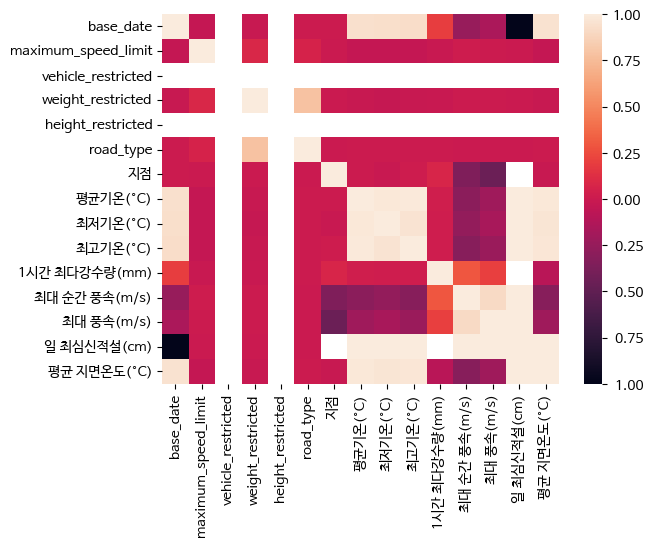

In [23]:
sns.heatmap(cor)

- 제주도 지역별 일 최다강수량

<function matplotlib.pyplot.show(close=None, block=None)>

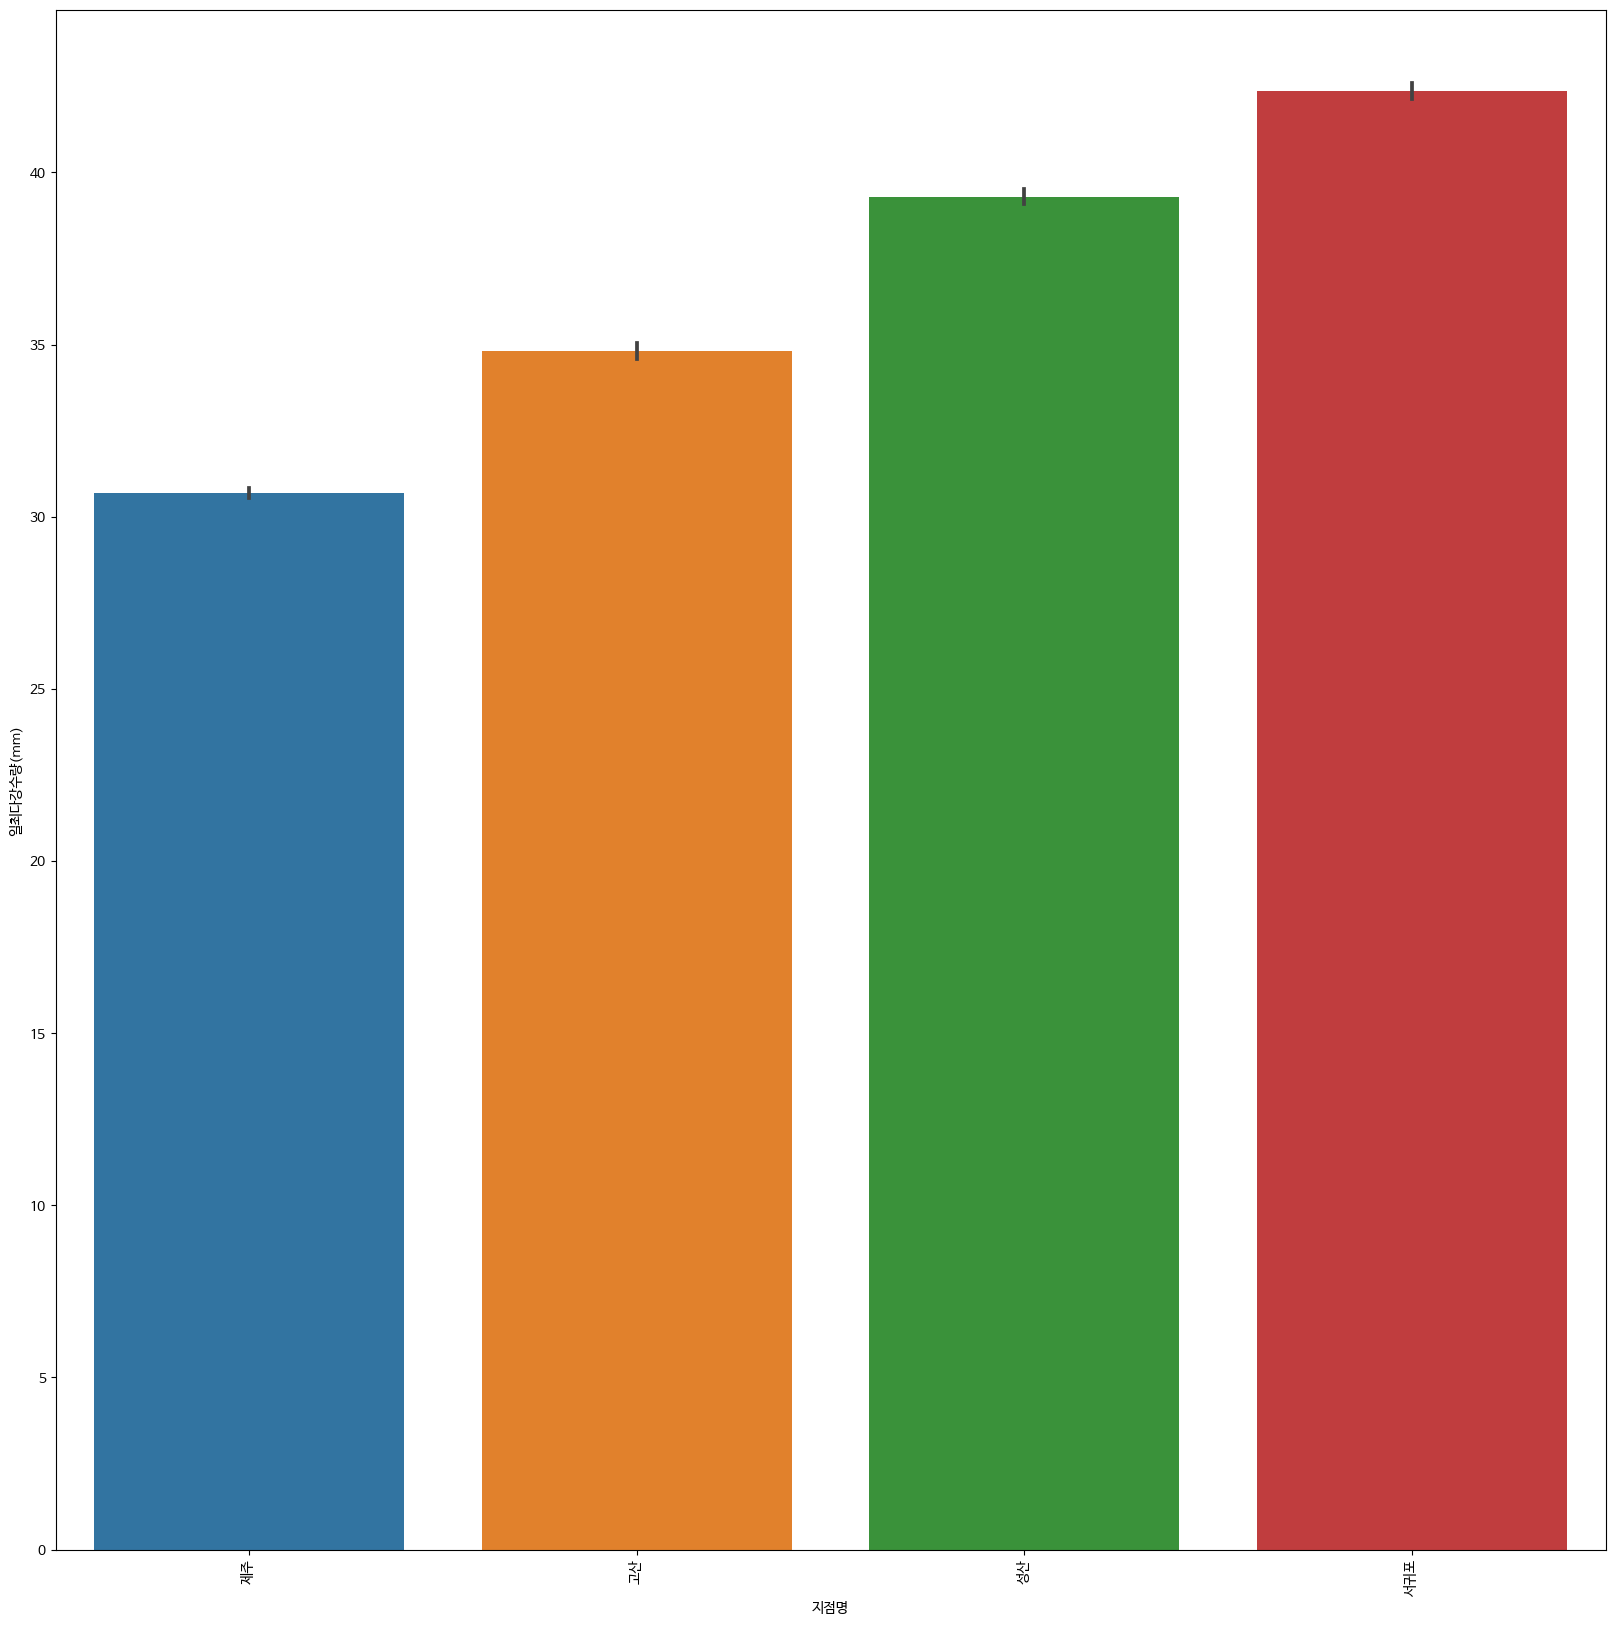

In [52]:
plt.figure(figsize = (20, 20))
sns.barplot(data = TW,x = '지점명', y = '일최다강수량(mm)')

plt.xticks(rotation= 90)
plt.show

- 월별 비가 가장 많이 내릴 때 나타난 최고 속도

<Axes: xlabel='date', ylabel='일최다강수량(mm)'>

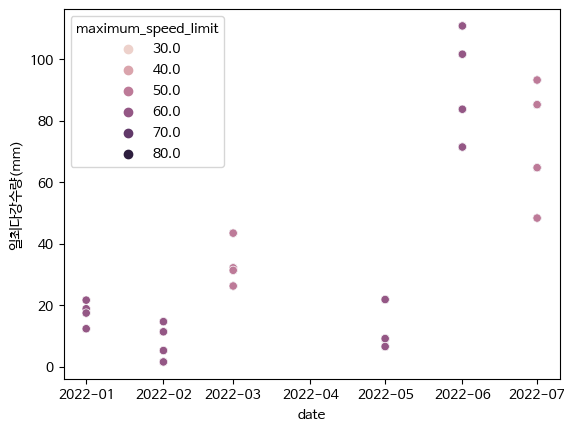

In [58]:
sns.scatterplot(x='date',y='일최다강수량(mm)',hue='maximum_speed_limit',data=TW)

- 월별 기온과 최고 속도 제한 비교

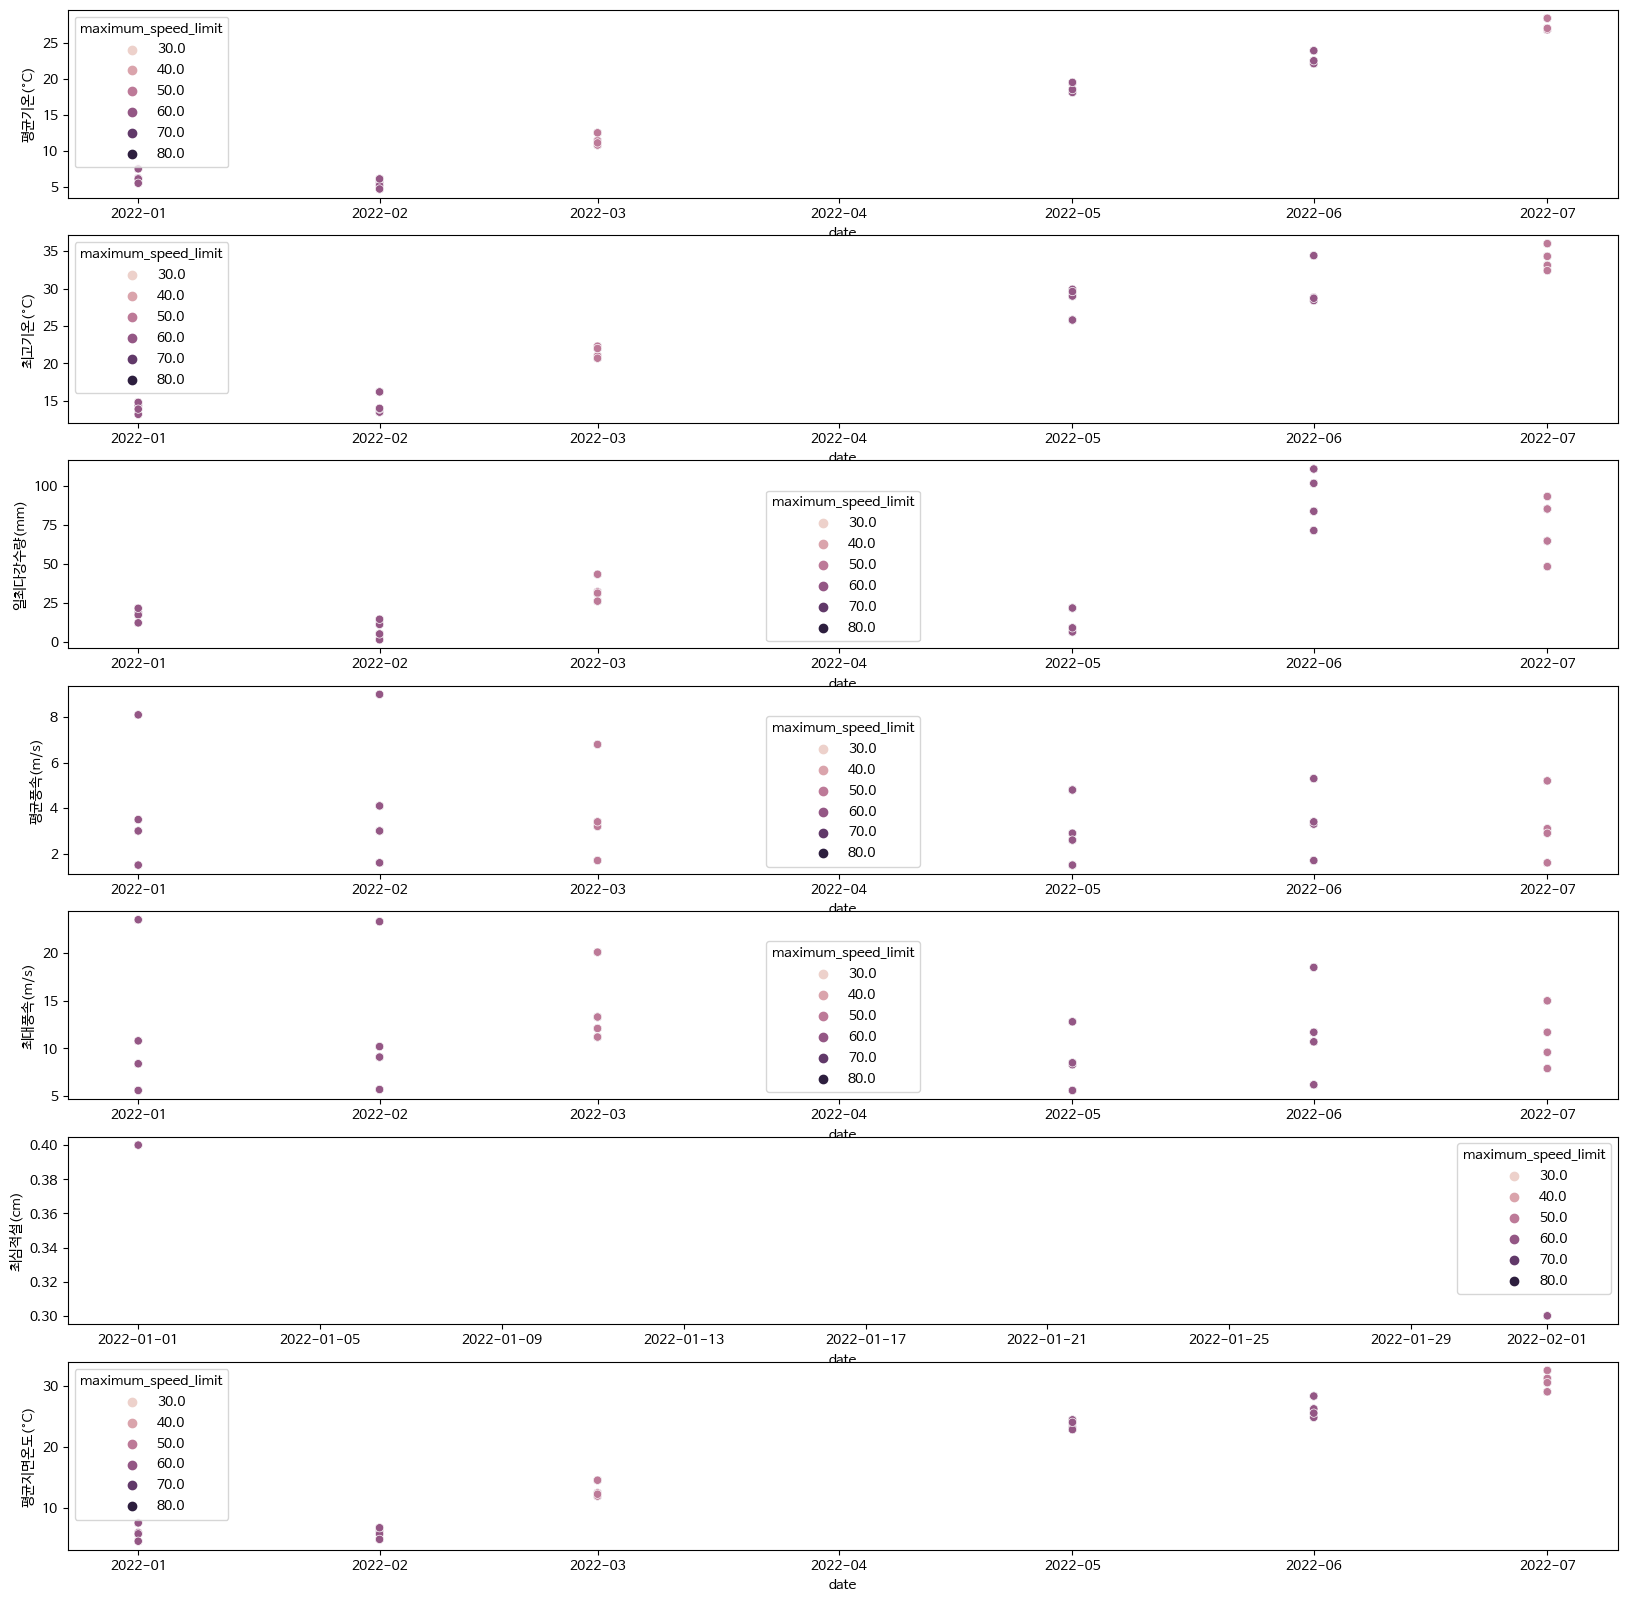

In [59]:
from matplotlib import gridspec 
grid = gridspec.GridSpec(7, 1)
plt.figure(figsize=(20,20))

features = ['평균기온(°C)','최고기온(°C)','일최다강수량(mm)','평균풍속(m/s)','최대풍속(m/s)','최심적설(cm)','평균지면온도(°C)']

for idx, feature in enumerate(features):
  ax = plt.subplot(grid[idx])
  sns.scatterplot(x='date',y=feature,hue='maximum_speed_limit',data=TW)


- 최고 속도별 날시 비교

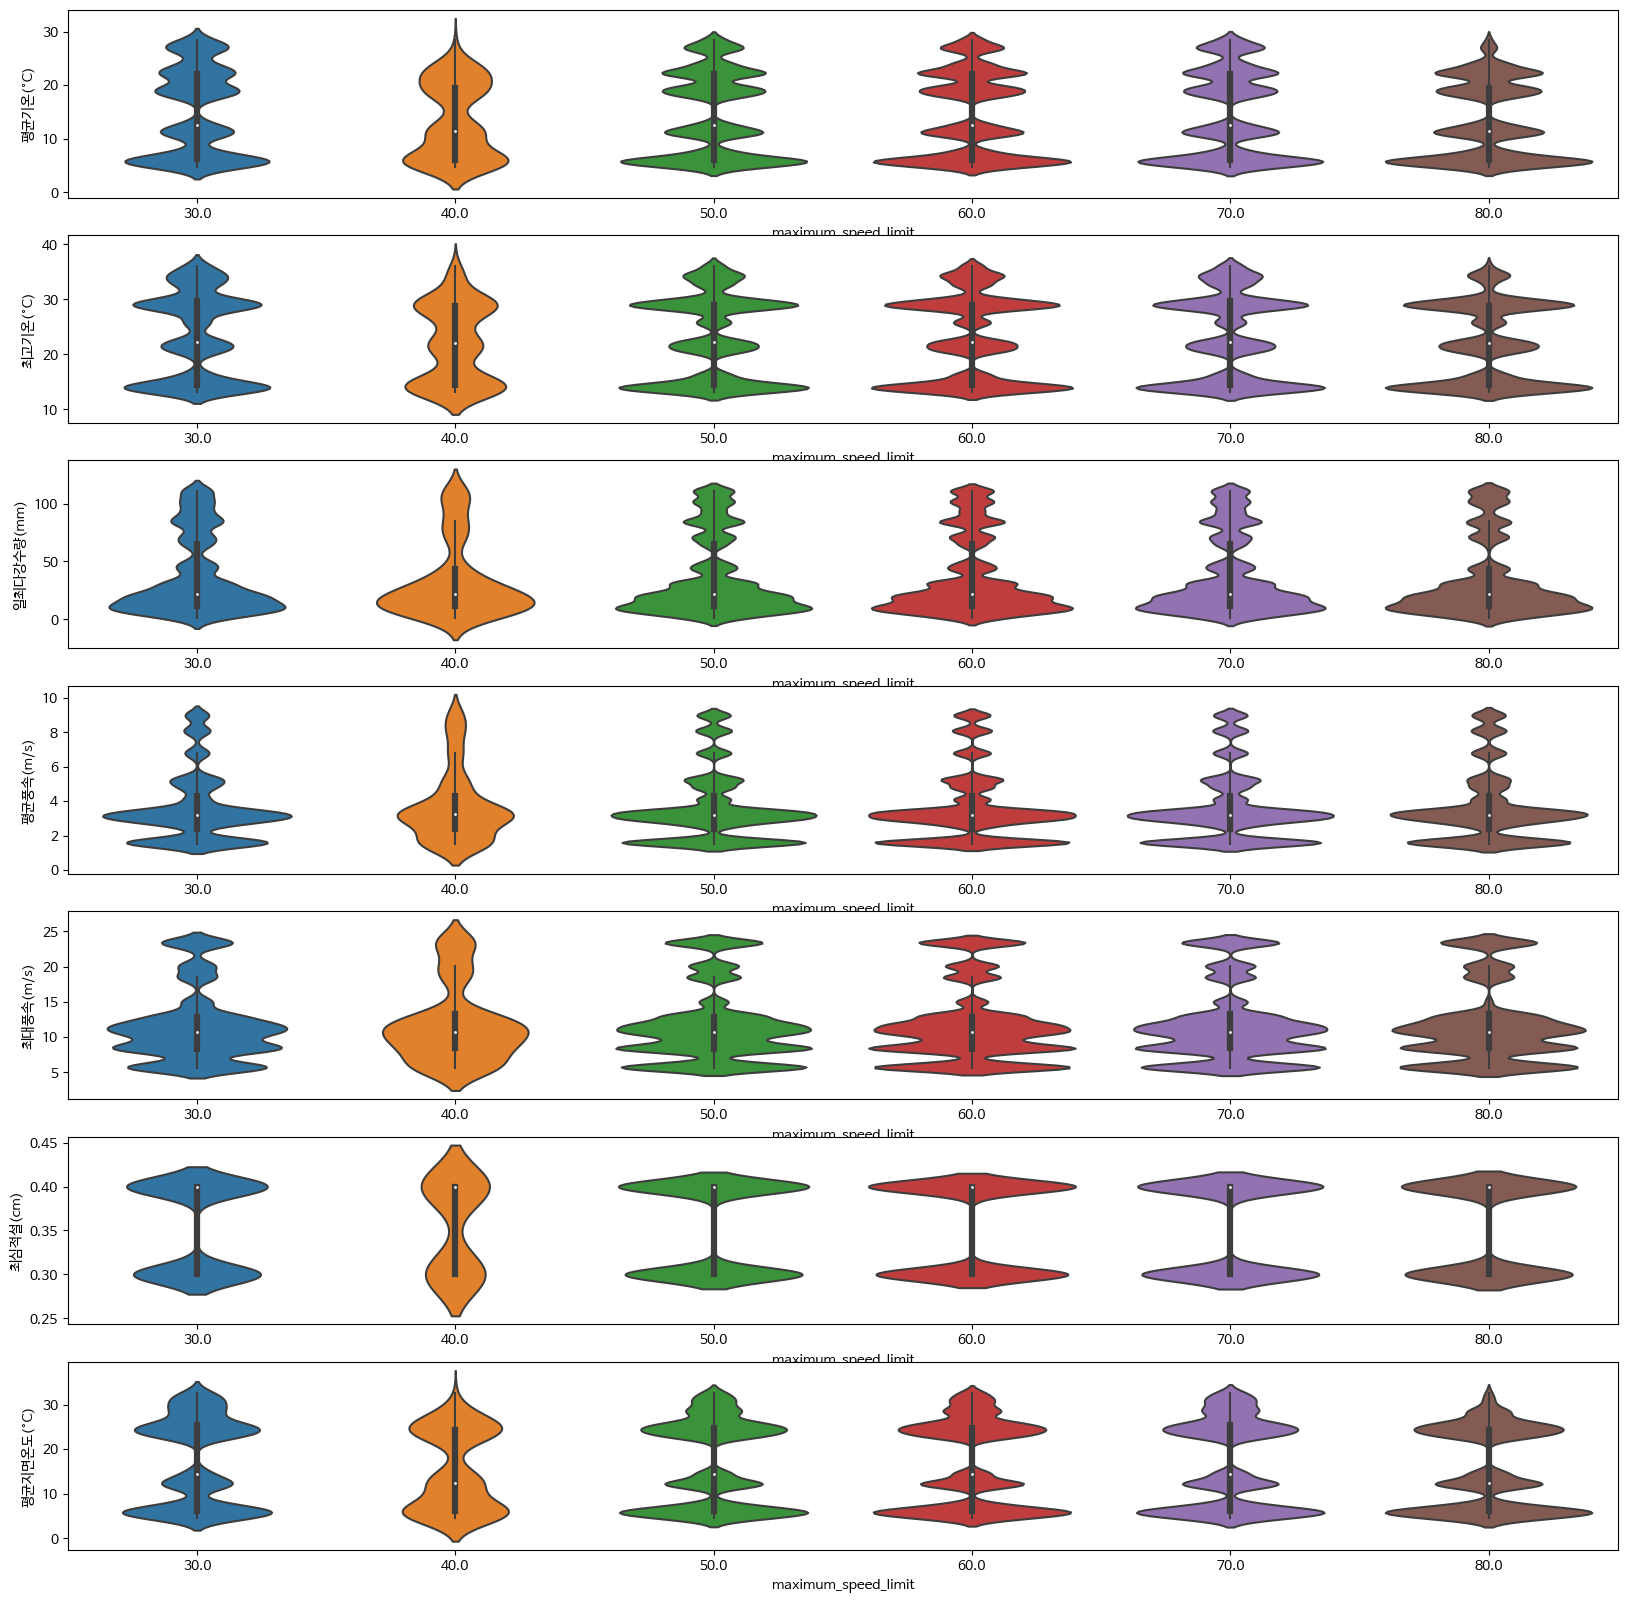

In [61]:
from matplotlib import gridspec 
grid = gridspec.GridSpec(7, 1)
plt.figure(figsize=(20,20))

features = ['평균기온(°C)','최고기온(°C)','일최다강수량(mm)','평균풍속(m/s)','최대풍속(m/s)','최심적설(cm)','평균지면온도(°C)']

for idx, feature in enumerate(features):
  ax = plt.subplot(grid[idx])
  sns.violinplot(x='maximum_speed_limit',y=feature,data=TW)


- 길 종류별 최고 속도 제한

<Axes: xlabel='maximum_speed_limit', ylabel='road_type'>

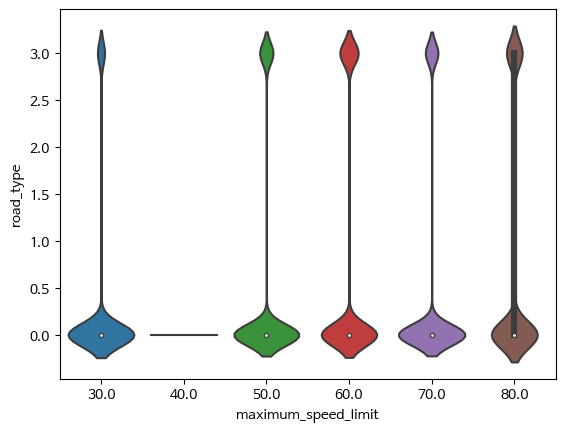

In [60]:
sns.violinplot(data=TW,x='maximum_speed_limit',y='road_type')

- 월별 날씨 비교

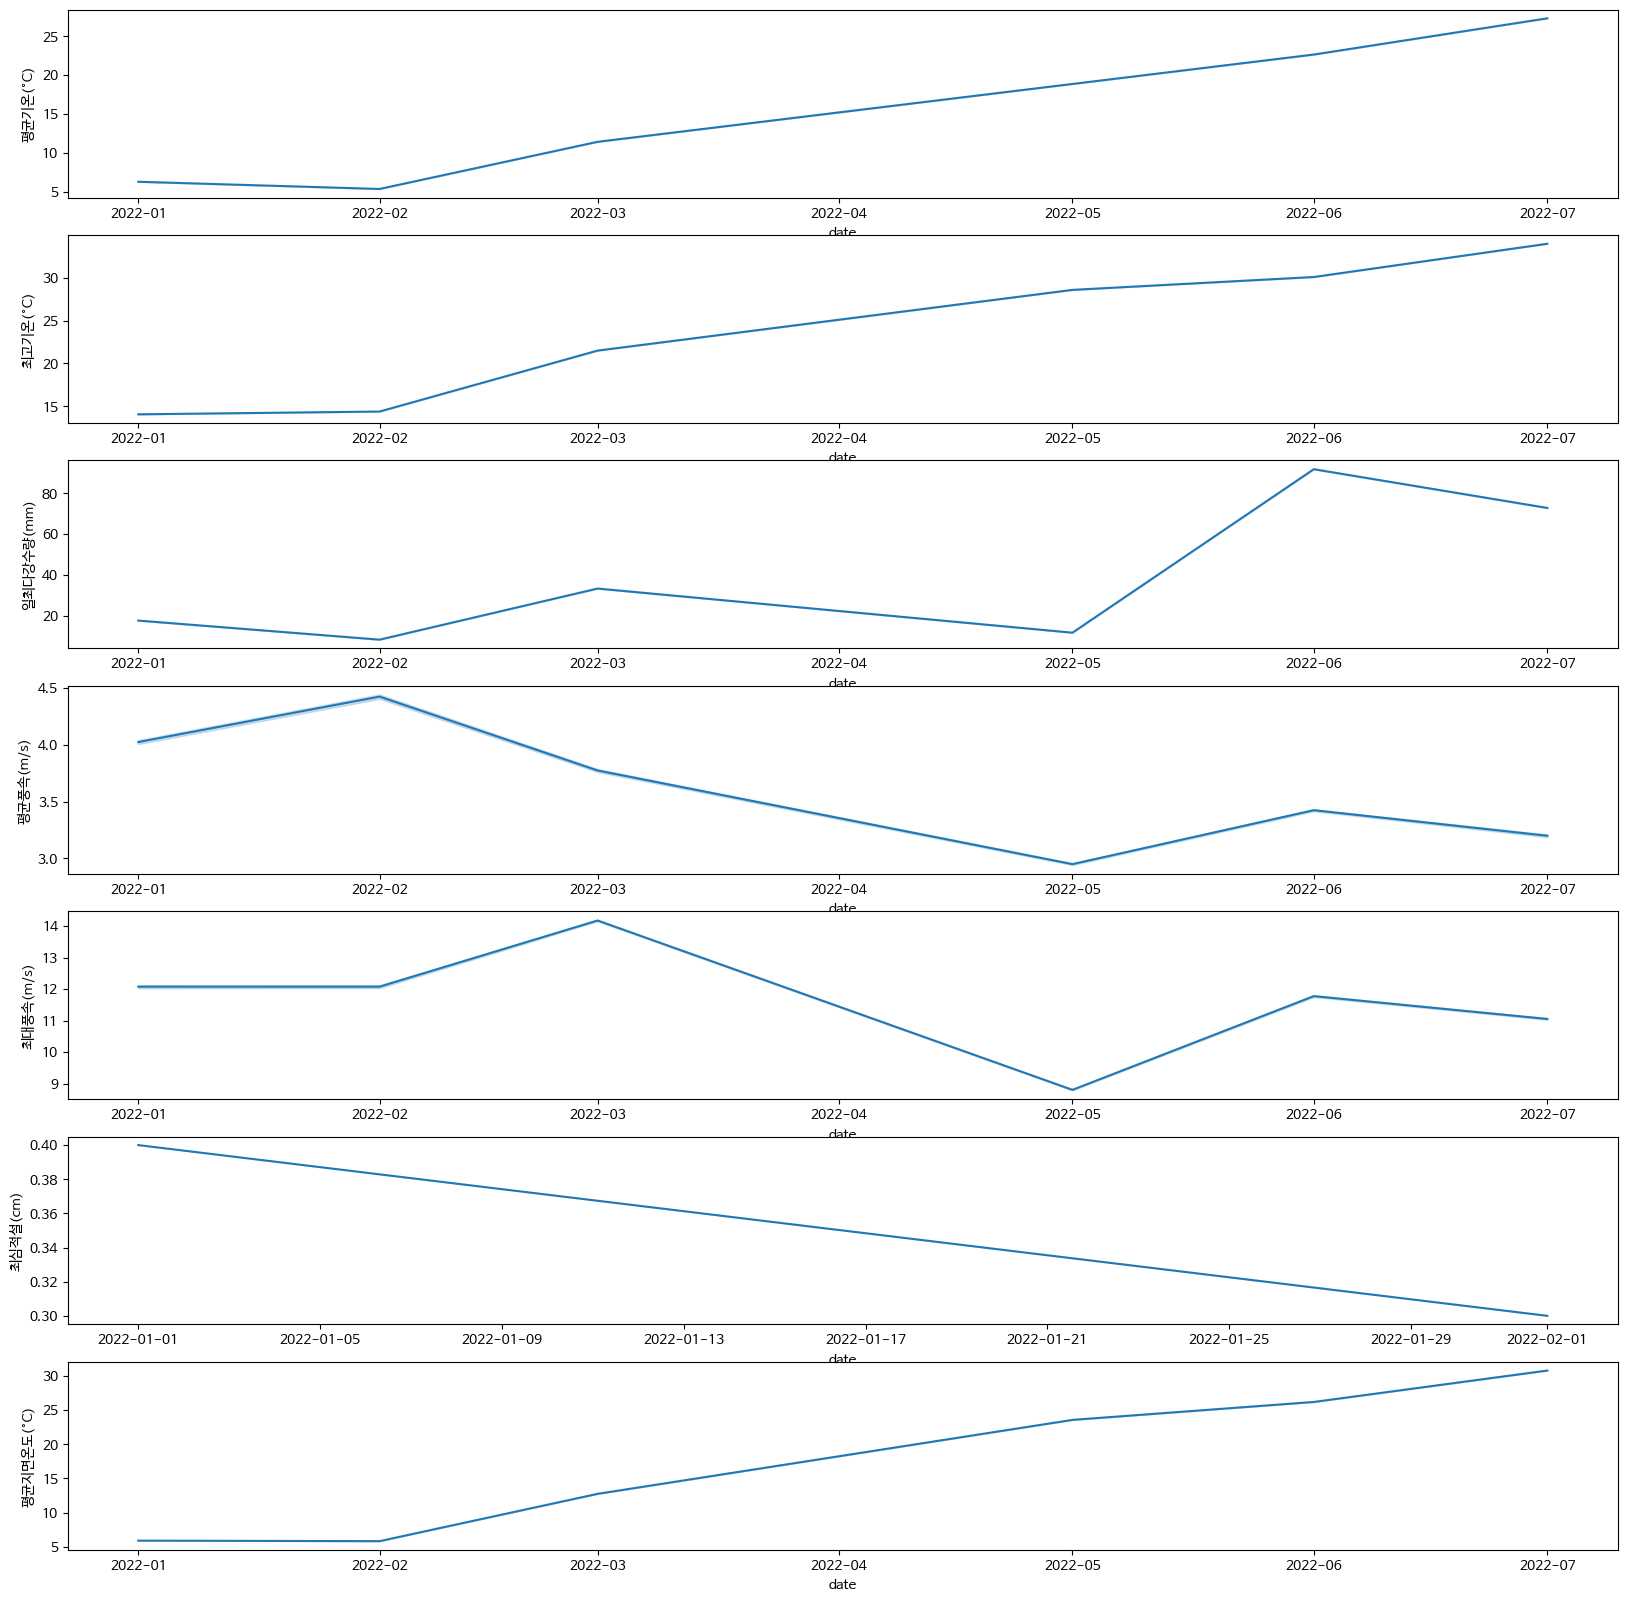

In [57]:
from matplotlib import gridspec 
grid = gridspec.GridSpec(7, 1)
plt.figure(figsize=(20,20))

features = ['평균기온(°C)','최고기온(°C)','일최다강수량(mm)','평균풍속(m/s)','최대풍속(m/s)','최심적설(cm)','평균지면온도(°C)']

for idx, feature in enumerate(features):
  ax = plt.subplot(grid[idx])
  sns.lineplot(x='date',y=feature,data=TW)
